In [3]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline
import random

import pandas as pd
from scipy import stats

# A) Data Fitting with Least Squares: simple examples

### 1) Fit with a line

Suppose we want to fit the points below using a line:

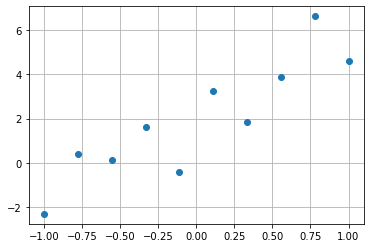

In [4]:
n = 10
t = np.linspace(-1, 1, n)
y = 4*t  + np.random.randn(n)  + 2

plt.plot(t,y,'o')
plt.grid()

We want to use a fit function with the form:

$$ y = x_0 + x_1 t $$

What's the system of equations for $x_0$ and $x_1$? We will solve the least squares problem by solving the Normal Equations $$ A^T A x = A^T b$$

Write the model matrix:

In [5]:
m = len(t)
n = 2

In [6]:
A = np.ones((m,n))
A[:,1] = t

Build the arrays needed to solve the normal equations

In [7]:
AtA = A.T@A
Atb = A.T@y

Solve the linear system of equations:

In [8]:
x = la.solve(AtA,Atb)

In [9]:
x

array([1.96264192, 3.52017654])

Plot the fit:

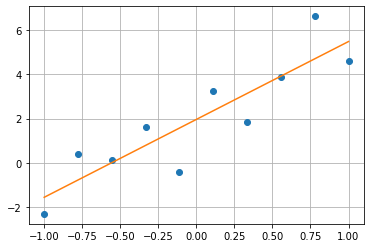

In [10]:
plt.plot(t, y, 'o')
plt.plot(t,  x[1] * t + x[0])
plt.grid()

### 2) Fit with a quadratic curve

What if the set of points looks like this?

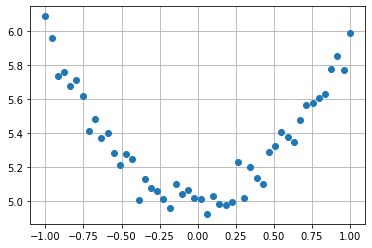

In [11]:
n = 50
t = np.linspace(-1, 1, n)
y = t ** 2 + np.random.randn(n) * 0.05 + 5

plt.plot(t, y, 'o')
plt.grid()

We want to use a fit function with the form:

$$ y = x_0 + x_1 t + x_2 t^2$$

In [12]:
m = len(t)
n = 3 # we want to find three coefficients to fit with a quadratic function

A = np.ones((m,n))
A[:,1] = t
A[:,2] = t**2

#Build the arrays needed to solve the normal equations

AtA = A.T@A
Atb = A.T@y

#Solve the linear system of equations:

x = la.solve(AtA,Atb)

In [13]:
x

array([ 5.00236849, -0.00523266,  0.99049669])

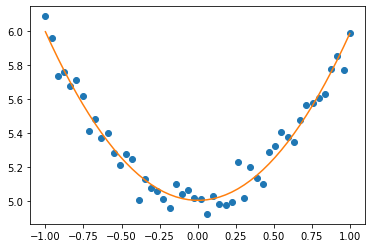

In [14]:
plt.plot(t, y, 'o')
plt.plot(t, x[2] * t ** 2 + x[1] * t + x[0])

### 3) Fit an exponential curve

What if the set of points looks like this?

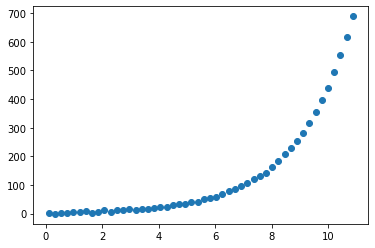

In [15]:
n = 50
t = np.linspace(0.1, np.e * 4, n)
y = np.exp(t * 0.5) * 3 + np.random.randn(n) * 2

plt.plot(t, y, 'o')

We want to use a fit function with the form:

$$ y = x_0\,e^{x_1 \, t} $$

Noticed that we can't directly use linear least squares here since the function is not linear with respect to all the coefficients $x_i$.  What if we take the natural log of both sides?

$$ \ln y = \ln x_0 + x_1 t $$

with the change of variables $\bar y = \ln y$ and $\bar x_0 = \ln x_0$ we can re-write the above equation as:

$$ \bar y  = \bar x_0 + x_1 t $$

In [16]:
m = len(t)
n = 2 # we want to find three coefficients to fit with a quadratic function

A = np.ones((m,n))
A[:,1] = t

#Build the arrays needed to solve the normal equations

AtA = A.T@A
Atb = A.T@np.log(y)

#Solve the linear system of equations:

x = la.solve(AtA,Atb)

<ipython-input-16-c36bf2441e2e>:10: RuntimeWarning: invalid value encountered in log
  Atb = A.T@np.log(y)


In [17]:
x

array([nan, nan])

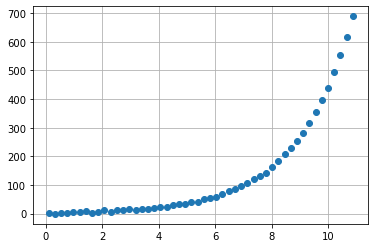

In [18]:
x0 = np.exp(x[0])
plt.plot(t, y, 'o')
plt.plot(t,  x0 * np.exp(x[1]*t))
plt.grid()

### 4) building stories vs height

In [19]:
data = pd.read_csv('bldgstories.txt', delim_whitespace=True)

In [20]:
year = data.values[:,0]
hght = data.values[:,1]
stories= data.values[:,2]

Text(0, 0.5, 'stories')

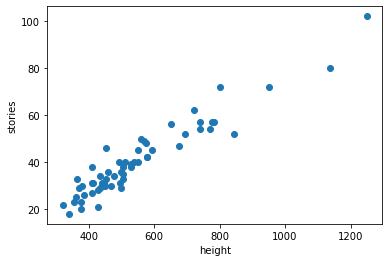

In [21]:
plt.plot(hght, stories, 'o')
plt.xlabel('height')
plt.ylabel('stories')

We want to use a fit function with the form:

$$ y = x_0 + x_1 t $$

The model matrix is:

In [22]:
m = len(hght)
n = 2 

A = np.ones((m,n))
A[:,1] = hght

Solving using normal equations:

In [23]:
AtA = A.T@A
Atb = A.T@stories

x = la.solve(AtA,Atb)
print(x)

[-3.33129846  0.08001458]


In [24]:
# Get the residual Euclidean norm:
print( la.norm(A@x-stories,2) )

# Squared of the Euclidean norm of the residual
print( la.norm(A@x-stories,2)**2 )

37.39104302480999
1398.0900984831917


Using the least-squares built-in function:

In [25]:
coeff, residual, rank, singvalues = la.lstsq(A,stories,rcond=None)
print(coeff)

print(residual)

print(rank)

print(singvalues)

[-3.33129846  0.08001458]
[1398.09009848]
2
[4.46706748e+03 2.48020755e+00]


In [26]:
u,s,vt = la.svd(A)
print(s)

[4.46706748e+03 2.48020755e+00]


Or using another built-in function for linear regression:

In [27]:
a, b, rvalue, pvalue, stderr = stats.linregress(hght, stories)
print(a)
print(b)

0.08001457924032182
-3.3312984582958265


In [28]:
print(rvalue)

0.9505548942627724


Text(0, 0.5, 'stories')

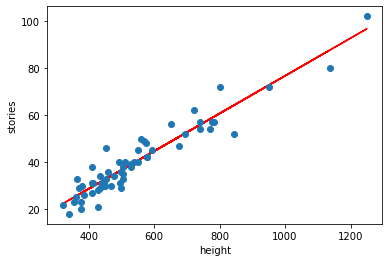

In [29]:
plt.plot(hght, x[0] + x[1]*hght , 'r-')
plt.plot(hght, stories, 'o')
plt.xlabel('height')
plt.ylabel('stories')

### 5) eye sight distance vs age

In [30]:
data = pd.read_csv('signdist.txt', delim_whitespace=True)

In [31]:
age = data.values[:,0]
distance = data.values[:,1]

0.8012446509407871


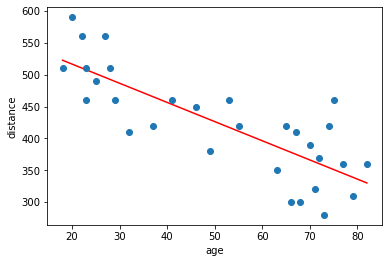

In [32]:
a, b, rvalue, pvalue, stderr = stats.linregress(age, distance)
plt.plot(age, a*age + b, 'r-')
plt.plot(age, distance, 'o')
plt.xlabel('age')
plt.ylabel('distance')

print(abs(rvalue))

### 6) height vs GPA

What?!

In [33]:
data = pd.read_csv('heightgpa.txt', delim_whitespace=True)

In [34]:
height = data.values[:,0]
gpa = data.values[:,1]

0.05324125988691996


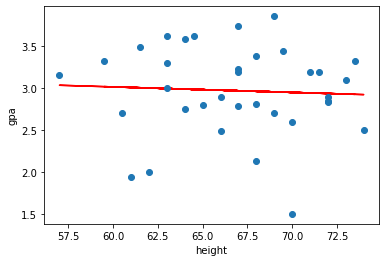

In [35]:
a, b, rvalue, pvalue, stderr = stats.linregress(height, gpa)
plt.plot(height, a*height + b, 'r-')
plt.plot(height, gpa, 'o')
plt.xlabel('height')
plt.ylabel('gpa')

print(abs(rvalue))

# B) Modeling ice extent over time

![Ice Extent](./additional_files/ice.png)

In addition to fitting functions to datapoints, we can use least squares to make predictions on events that may happen in the future.  Here we have a dataset containing the extent of arctic sea ice over the years, which we can fit a least squares model to and predict the extent of arctic ice in future years.

This is based on data from:

http://ww2.amstat.org/publications/jse/v21n1/witt.pdf

http://nsidc.org/research/bios/fetterer.html

ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/N_08_extent_v3.0.csv

In [36]:
data = pd.read_csv('N_09_extent_v3.0.csv', dtype={'year': np.int32, 'extent': np.double})

In [37]:
data.head()

,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58
1,1980,9,Goddard,N,7.67,4.87
2,1981,9,Goddard,N,7.14,4.44
3,1982,9,Goddard,N,7.30,4.43
4,1983,9,Goddard,N,7.39,4.70


In [38]:
print(data.shape)

(39, 6)


In [39]:
year = data['year']
extent = data[' extent']

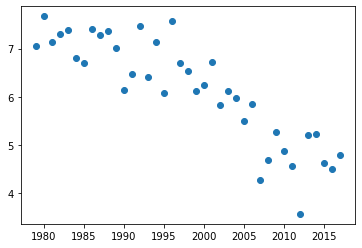

In [40]:
plt.figure(figsize=(6,4))
plt.plot(year, extent, 'o')

### Fitting with a line

In [41]:
npoints = data.shape[0]
print('number of data points = ', npoints)

number of data points =  39


In [42]:
def fitfunction(t,coeffs):
    fit = 0
    for i,c in enumerate(coeffs):
        fit += c*t**i
    return  fit

In [43]:
ndata = 20 #use the first ndata points for the fit
year1 = year[:ndata]
extent1 = extent[:ndata]

A = np.array([
    1+0*year1,
    year1
    ]).T

b = np.array(extent1)

x = la.solve(A.T@A,A.T@b)

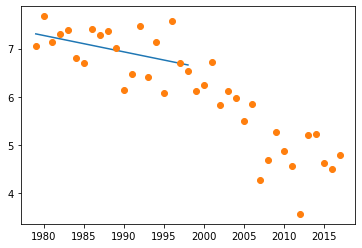

In [44]:
plt.plot(year1, fitfunction(year1,x))
plt.plot(year, extent, 'o')

### How did the linear fit "fit" as time time progresses?

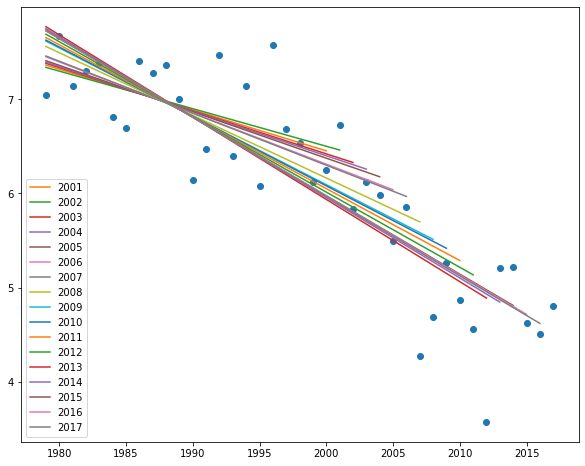

In [45]:
plt.figure(figsize=(10,8))
plt.plot(year, extent, 'o')

for ndata in range(22, npoints):
    
    year1 = year[:ndata]
    extent1 = extent[:ndata]

    A = np.array([
        1+0*year1,
        year1
        ]).T

    b = np.array(extent1)

    x = la.solve(A.T@A,A.T@b)
    
    plt.plot(year1, fitfunction(year1,x),  label='%d' % (year[0]+ndata))
    
plt.legend()

### Let's try a quadratic fit

In [46]:
ndata = 26 #use the first ndata points for the fit
year1 = year[:ndata]
extent1 = extent[:ndata]

A = np.array([
    1+0*year1,
    year1,
    year1**2
    ]).T

b = np.array(extent1)

x = la.solve(A.T@A,A.T@b)

print(x)

[6.79221628e+00 7.00452986e-07 3.50158197e-10]


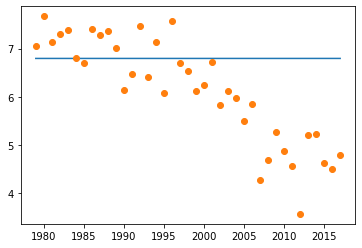

In [47]:
plt.plot(year, fitfunction(year,x))
plt.plot(year, extent, 'o')

### What went wrong?

Let's try to use the least square function from scipy

[-5.78703451e+03  5.86799957e+00 -1.48565324e-03]


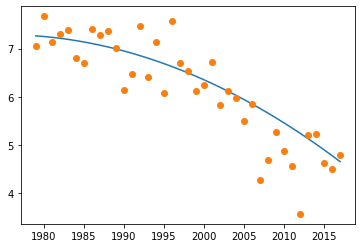

In [48]:
coeffs,residual,rank,sval=np.linalg.lstsq(A,b,rcond=None)

plt.plot(year, fitfunction(year,coeffs))
plt.plot(year, extent, 'o')

print(coeffs)


Seems to work with `lstsq`... what could be the issue with the Normal Equations method above?

Let's check the condition number of the matrix A

In [49]:
print(la.cond(A))
print(x)
print(la.norm(A@x-b))

313354558941.1675
[6.79221628e+00 7.00452986e-07 3.50158197e-10]
2.7991699750018357


The matrix A becomes closer to singular as the number of columns increases (i.e., as the number of coefficients for the fit increase). We can scale the years, to mitigate this situation:

In [50]:
year2 = year - 1980
extent2 = extent

A = np.array([
    1+0*year2,
    year2,
    year2**2
    ]).T

b = np.array(extent2)

x = la.solve(A.T@A,A.T@b)


print(la.cond(A))
print(x)


1593.2774157903386
[ 7.32702301e+00 -2.55283521e-02 -1.60576890e-03]


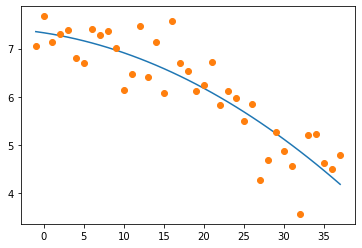

In [51]:
plt.plot(year2, fitfunction(year2,x))
plt.plot(year2, extent, 'o')

# C) Linear Least Squares using SVD

The function below creates a random matrix and a random right-hand side vector, to use as input data for least squares. The arguments of the function are the shape of A, and the rank of A. You should run examples to investigate the following situations:

1) rankA = N (this is a full rank matrix, and hence solution is unique

2) rankA = N - 1 (this is a rank deficient matrix, and the solution is no longer unique

In [52]:
def creates_A_b(shap = (10,4), rankA=4):
    M,N = shap
    # Generating the orthogonal matrix U
    X = np.random.rand(M,M)
    U,R = sla.qr(X)
    # Generating the orthogonal matrix V
    Y = np.random.rand(N,N)
    V,R = sla.qr(Y)
    Vt = V.T
    # Generating the diagonal matrix Sigma
    singval = random.sample(range(1, 9), rankA)
    singval.sort()
    sigmavec = singval[::-1]
    sigma = np.zeros((M,N))
    for i,sing in enumerate(sigmavec):
        sigma[i,i] = sing
    A = U@sigma@Vt
    b = np.random.rand(M)
    return(A,b)

In [53]:
# Matrix shape
M = 10
N = 4
r = 2
A,b = creates_A_b((M,N),r)

In [54]:
print(la.cond(A))

2.6062634473898867e+17


### 1) Using normal equations (unique solution, full rank)

In [55]:
xu = la.solve(A.T@A,A.T@b)
print(xu)

[ 0.06879246  0.16915319  4.13508947 -0.23954067]


In [56]:
la.norm(A@xu-b,2)

1.034734569970669

In [57]:
la.norm(xu,2)

4.146045089076434

### 2) Using SVD

In [58]:
UR,SR,VRt = la.svd(A,full_matrices=False)
print(SR)

In [59]:
# ub = (UR.T@b)
# x = np.zeros(N)
# for i,s in enumerate(SR):
#     if s > 1e-15:
#         x += VRt[i,:]*ub[i]/s
# print(x)

In [60]:
Sinv = np.zeros((N,N))
for i,si in enumerate(SR):
    if si > 1e-12:
        Sinv[i,i] = 1/si

x = VRt.T@Sinv@UR.T@b
print(x)

In [61]:
la.norm(A@x-b,2)

In [62]:
la.norm(x,2)

In [63]:
## Side note (if we want to predict the residual based on the full SVD)
U,S,Vt = la.svd(A)
Sfullinv = np.zeros((N,M))
for i,si in enumerate(S):
    if si > 1e-12:
        Sfullinv[i,i] = 1/si

x = Vt.T@Sfullinv@U.T@b
print(x)

la.norm((U.T@b)[r:],2)

### 3) Using numpy.linalg Least Squares method

In [64]:
coeffs,residual,rank,sval=np.linalg.lstsq(A,b,rcond=None)
print(coeffs)

In [65]:
la.norm(A@coeffs-b,2)

In [66]:
la.norm(coeffs,2)

In [67]:
rank